In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import display, Latex
from sympy import *
from sympy.interactive import printing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter, EngFormatter
from scipy import stats
from math import log10
import os
from PyLTSpice import LTSpice_RawRead
printing.init_printing(use_latex=True)

Found Numpy. WIll be used for storing data


In [50]:
path_to_raw = 'C:\\Users\\Erik.Iverson\\Documents\\LTspiceXVII\\Integrator\\'
raw = os.path.join(path_to_raw+'Integrator8.raw')
LTR = LTSpice_RawRead.LTSpiceRawRead(raw) 

Normal access


In [51]:
t_sim = LTR.get_trace('time').get_time_axis()

#The waveform period is known - plot 1.4 periods
#get the index when t_sim = 2.4ms
#time step is not constant
def find_nearest(array,value):
    idx = (np.abs(array-value)).argmin()
    return idx

period = 2e-3
idx = find_nearest(t_sim, 1.4*period)
t_sim = t_sim[0:idx]

In [54]:
CapCommand = LTR.get_trace("V(comm)").get_wave()[0:idx]#LTR doesn't like node voltages with capital V
Vo1 = LTR.get_trace("V(vo1)").get_wave()[0:idx]
Viint = LTR.get_trace("V(iint)").get_wave()[0:idx]
Vs = LTR.get_trace("V(vs)").get_wave()[0:idx]
Icp = LTR.get_trace("Ix(x1:C+)").get_wave()[0:idx]
Vcp = LTR.get_trace("V(vcp)").get_wave()[0:idx]
Vcp = Vs - Vcp

Text(0, 0.5, 'Voltage')

Text(0, 0.5, 'Current')

Text(0, 0.5, 'Voltage')

Text(0.5, 0, 'Time')

Text(0, 0.5, 'Voltage')

Text(0.5, 0.98, 'One Period of Charge Integration Circuit')

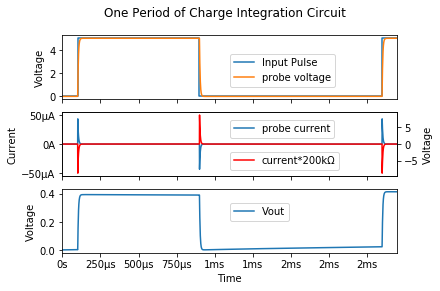

In [55]:
fig, (ax1, ax2,ax3) = plt.subplots(nrows=3, ncols=1, sharex=True)

ax1.plot(t_sim, Vs, label='Input Pulse')

ax1.plot(t_sim, Vcp, label = 'probe voltage')
ax1.set_ylabel('Voltage')
ax1.legend(loc=(.5,.2))

ax2.plot(t_sim, Icp, label='probe current')
ax2.set_ylim(top=55e-6, bottom=-55e-6)
ax4 = ax2.twinx()
ax4.plot(t_sim, Vo1, label='current*200k{:c}'.format(0x3A9), color='red')
ax2.set_ylabel('Current')
ax2.yaxis.set_major_formatter(EngFormatter(unit='A', places=0, sep=''))   
ax2.legend(loc=(.5,.6))
ax4.legend(loc=(.5,.1))
ax4.set_ylabel('Voltage')

ax3.plot(t_sim, Viint, label='Vout')
#ax3.plot(t_sim, vint, label='integrated current')
ax3.set_xlabel('Time')
ax3.set_ylabel('Voltage')
ax3.legend(loc=(.5,.5))

ax3.xaxis.set_major_formatter(EngFormatter(unit='s', places=0, sep=''))   
ax3.set_xlim(left=0, right=2.2e-3)
fig.suptitle('One Period of Charge Integration Circuit')
#plt.tight_layout()

Text(0.5, 0, 'Probe Capacitance')

Text(0, 0.5, 'Output Voltage')

Text(0.5, 1.0, 'Ouput Voltage vs Probe Capacitance')

Text(1e-12, 2.3705263157894736, 'Vout/Cprb = 1.0e+10V/F = 1.0e-02V/pF')

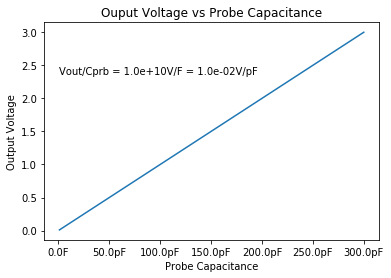

In [62]:
#plot  output amplitude vs probe capacitance 
#vout = R2/(C2*R3)C*Vin
cprb = np.linspace(1e-12, 300e-12, 20)
R2 = 200e3
R3 = 100e3
C2 = 1e-9
Vin = 5
vout = R2/(C2*R3)*cprb*Vin
fig, ax1 = plt.subplots()
ax1.plot(cprb, vout)
major_formatter= EngFormatter(unit='F', places=1, sep='')
ax1.xaxis.set_major_formatter(major_formatter)    
ax1.set_xlabel('Probe Capacitance')
ax1.set_ylabel('Output Voltage')
ax1.set_title('Ouput Voltage vs Probe Capacitance')
slope, intercept, r_value, p_value, std_err = stats.linregress(cprb, vout)
ax1.text(cprb[0], vout[15], 'Vout/Cprb = {:.1e}V/F = {:.1e}V/pF'.format(slope, slope/1e12))

In [66]:
LTR = LTSpice_RawRead.LTSpiceRawRead(raw) 
t_sim = LTR.get_trace('time').get_time_axis()

CapCommand = LTR.get_trace("V(comm)").get_wave()#LTR doesn't like node voltages with capital V
#Vo1 = LTR.get_trace("V(vo1)").get_wave()[0:idx]
Viint = LTR.get_trace("V(iint)").get_wave()
Vs = LTR.get_trace("V(vs)").get_wave()
comm = LTR.get_trace("V(comm)").get_wave()
Vcp = LTR.get_trace("V(vcp)").get_wave()
Vcp = Vs - Vcp

Normal access


Text(0, 0.5, 'Voltage')

Text(0, 0.5, 'Voltage')

Text(0.5, 0, 'Time')

Text(0.5, 0.98, 'Response with Varying Probe Cap')

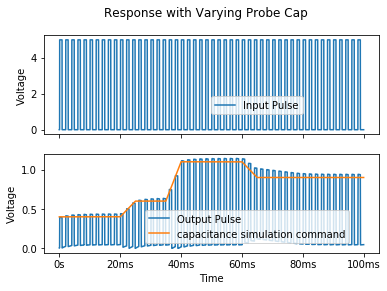

In [72]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True)

ax1.plot(t_sim, Vs, label='Input Pulse')


ax1.set_ylabel('Voltage')
ax1.legend(loc=(.5,.2))

ax2.plot(t_sim, Viint, label='Output Pulse')

ax2.plot(t_sim, comm, label='capacitance simulation command')
ax2.set_ylabel('Voltage')

ax2.legend(loc=(.3,.1))
ax1.xaxis.set_major_formatter(EngFormatter(unit='s', places=0, sep=''))   
ax2.set_xlabel('Time')


fig.suptitle('Response with Varying Probe Cap')
#plt.tight_layout()

'Ω'

In [4]:
vcomm = np.linspace(0, 1, 200)
fs = vcomm*16
fs_ = np.floor(fs)


In [5]:
fs_

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  2.,
        2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  2.,  3.,
        3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  3.,  4.,  4.,
        4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,
        5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  5.,  6.,  6.,  6.,
        6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  6.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  9.,
        9.,  9.,  9.,  9.,  9.,  9.,  9.,  9., 10., 10., 10., 10., 10.,
       10., 10., 10., 10., 10., 10., 10., 11., 11., 11., 11., 11., 11.,
       11., 11., 11., 11., 11., 11., 11., 12., 12., 12., 12., 12., 12.,
       12., 12., 12., 12., 12., 12., 13., 13., 13., 13., 13., 13., 13.,
       13., 13., 13., 13., 13., 13., 14., 14., 14., 14., 14., 14

In [9]:
2%1